In [ ]:
# import relevant packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.metrics import r2_score

# update the path to the project folder
import sys
import os
project_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.append(project_path)

# import py from src folder
from src.eda import plot_custom, barplot_compare, mannwhitney_test, chi2_test
from src.data_processing import convert_to_object, data_preparation, smote_tomek
from src.model import model, random_search

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import dataset
data = pd.read_csv(project_path+'/data/german_credit_data.csv', sep=";")
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonnds,Present employmnet since,Installment rate in percentage of disposable income,Personal status,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Label
0,< 0 DM,18,critical account / other credits existing (not...,furniture / equipment,1049,< 100 DM,< 1 year,4,female: divorced/separated/married,none,...,building society savings agreement / life insu...,21,none,rent,1,skilled employee / official,1,none,yes,0
1,< 0 DM,9,critical account / other credits existing (not...,car (new),2799,< 100 DM,1 - 4 years,2,male: single,none,...,real estate,36,none,rent,2,skilled employee / official,2,none,yes,0
2,0 - 200 DM,12,existing credits paid back duly till now,business,841,100 - 500 DM,4 - 7 years,2,female: divorced/separated/married,none,...,real estate,23,none,rent,1,unskilled - resident,1,none,yes,0
3,< 0 DM,12,critical account / other credits existing (not...,car (new),2122,< 100 DM,1 - 4 years,3,male: single,none,...,real estate,39,none,rent,2,unskilled - resident,2,none,no,0
4,< 0 DM,12,critical account / other credits existing (not...,car (new),2171,< 100 DM,1 - 4 years,4,male: single,none,...,building society savings agreement / life insu...,38,bank,own,2,unskilled - resident,1,none,no,0


# EDA

In [ ]:
# checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonnds                                    1000 non-null   object
 6   Present employmnet since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status              

In [ ]:
# convert data type into its correct type
columns_to_convert = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonnds', 'Present employmnet since', 'Personal status', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

data = convert_to_object(data, columns_to_convert)

In [ ]:
# checking null values
data.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonnds                                      0
Present employmnet since                                    0
Installment rate in percentage of disposable income         0
Personal status                                             0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [ ]:
# split to not default and default
df_0 = data.loc[data['Label']==0]
df_1 = data.loc[data['Label']==1]

print('Data Shape: ',data.shape)
print('Data Default Shape: ',df_0.shape)
print('Data Not Default Shape: ',df_1.shape)

Data Shape:  (1000, 21)
Data Default Shape:  (700, 21)
Data Not Default Shape:  (300, 21)


## Descriptive Statistics

### Numerical Columns

In [ ]:
# numerical variable
data.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Label
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,2.845000,35.54200,1.407000,1.155000,0.300000
std,12.058814,2822.75176,1.118715,1.103718,11.35267,0.577654,0.362086,0.458487
min,4.000000,250.00000,1.000000,1.000000,19.00000,1.000000,1.000000,0.000000
25%,12.000000,1365.50000,2.000000,2.000000,27.00000,1.000000,1.000000,0.000000
50%,18.000000,2319.50000,3.000000,3.000000,33.00000,1.000000,1.000000,0.000000
75%,24.000000,3972.25000,4.000000,4.000000,42.00000,2.000000,1.000000,1.000000
max,72.000000,18424.00000,4.000000,4.000000,75.00000,4.000000,2.000000,1.000000


### `Duration in month`

Text(0.5, 1.0, 'Duration in month')

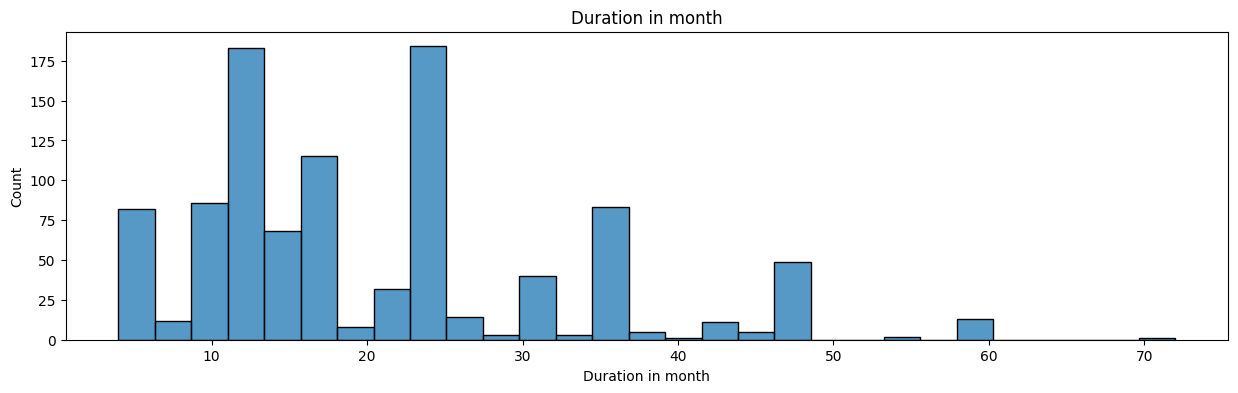

In [9]:
plot_custom(data, x_val = 'Duration in month',types = "hist")
plt.title('Duration in month')

### `Credit amount`

Text(0.5, 1.0, 'Credit amount')

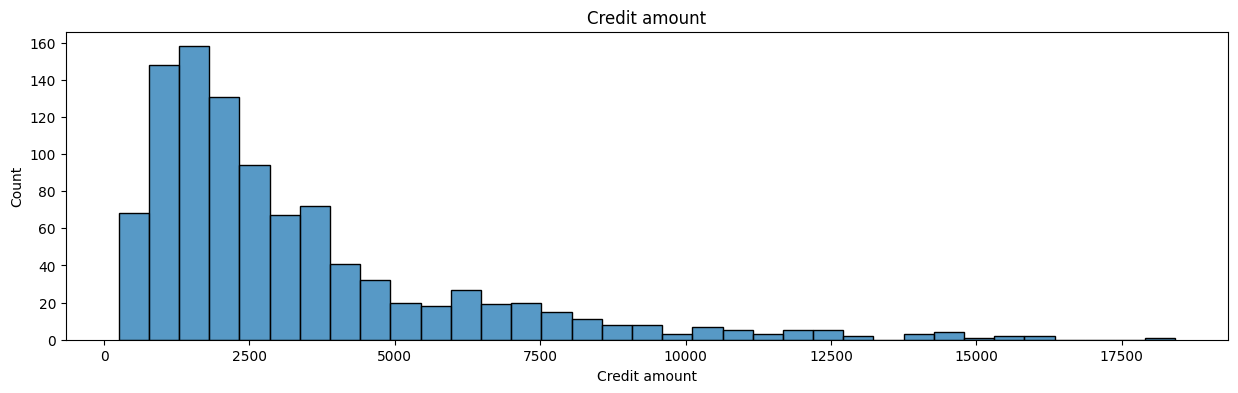

In [10]:
plot_custom(data, x_val = 'Credit amount',types = "hist")
plt.title('Credit amount')

### `Installment rate in percentage of disposable income`

Text(0.5, 1.0, 'Installment rate in percentage of disposable income')

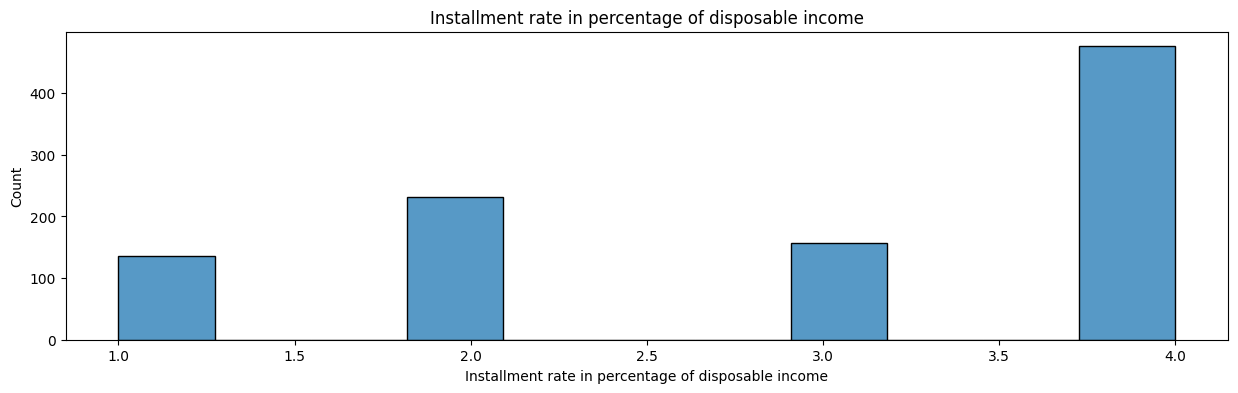

In [12]:
plot_custom(data, x_val = 'Installment rate in percentage of disposable income',types = "hist")
plt.title('Installment rate in percentage of disposable income')

### `Present residence since`

Text(0.5, 1.0, 'Present residence since')

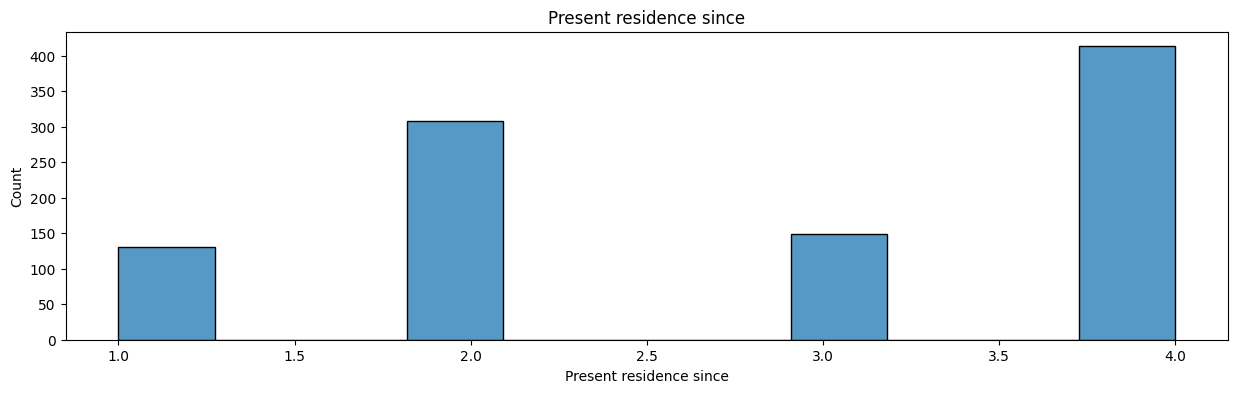

In [13]:
plot_custom(data, x_val = 'Present residence since',types = "hist")
plt.title('Present residence since')

### `Age in years`

Text(0.5, 1.0, 'Age in years')

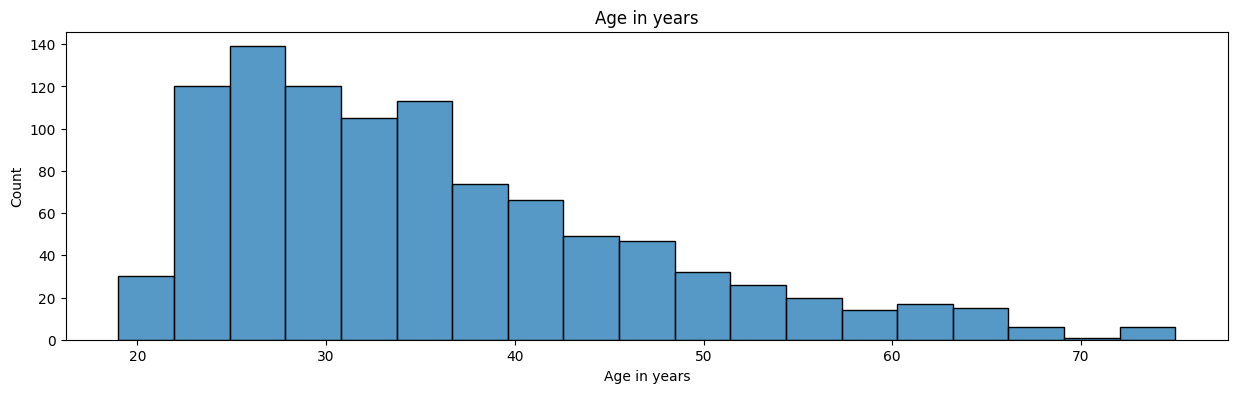

In [14]:
plot_custom(data, x_val = 'Age in years',types = "hist")
plt.title('Age in years')

### `Number of existing credits at this bank`

Text(0.5, 1.0, 'Number of existing credits at this bank')

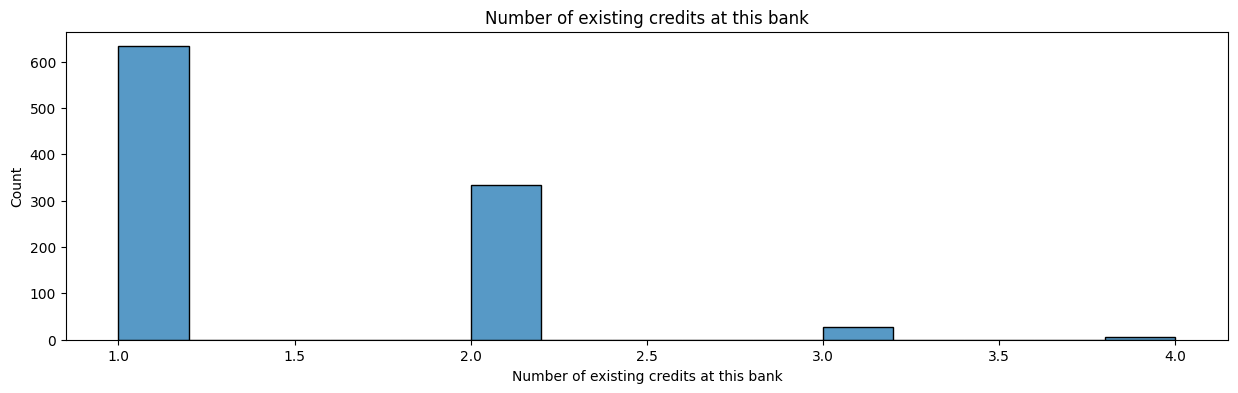

In [15]:
plot_custom(data, x_val = 'Number of existing credits at this bank',types = "hist")
plt.title('Number of existing credits at this bank')

### `Number of people being liable to provide maintenance for`

Text(0.5, 1.0, 'Number of people being liable to provide maintenance for')

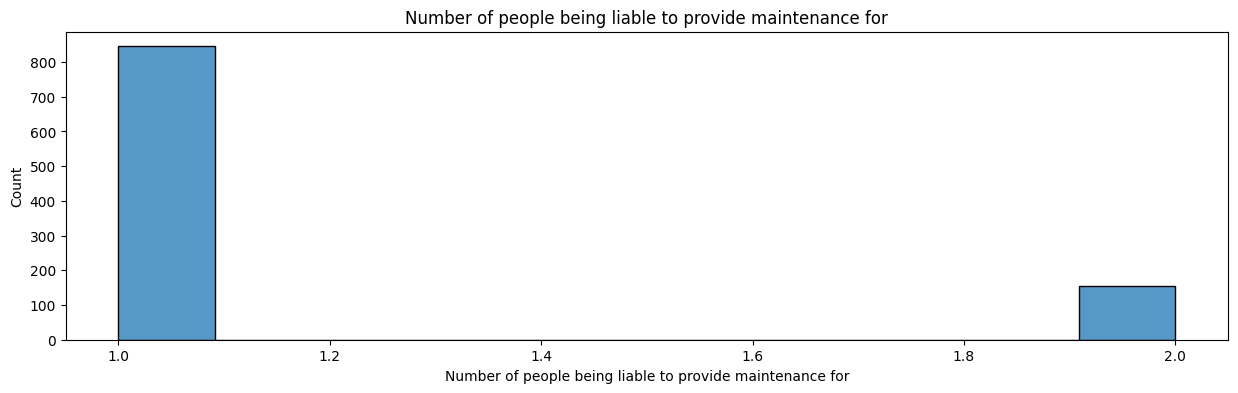

In [16]:
plot_custom(data, x_val = 'Number of people being liable to provide maintenance for',types = "hist")
plt.title('Number of people being liable to provide maintenance for')

The chart shows that the distributions of `Credit amount` and `Age in years` are skewed. Log transformation will be applied to these variables in the data processing section below to improve the modeling.

### Categorical Columns

In [ ]:
# categorical variable
data.describe(include='object')

,Status of existing checking account,Credit history,Purpose,Savings account/bonnds,Present employmnet since,Personal status,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking account,existing credits paid back duly till now,radio / television,< 100 DM,1 - 4 years,male: single,none,car or other,none,own,skilled employee / official,none,yes
freq,394,530,280,603,339,548,907,332,814,714,630,596,963


### `Status of existing checking account`

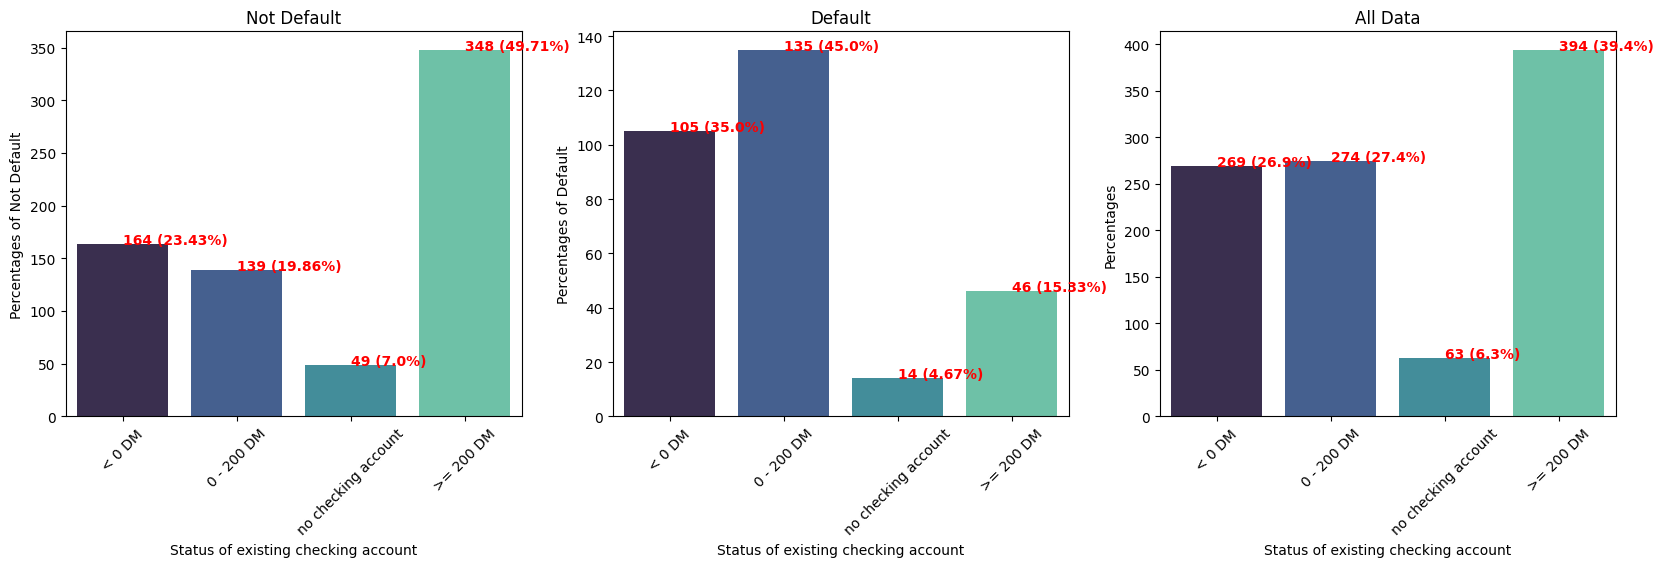

In [18]:
barplot_compare(data, 'Status of existing checking account')

### `Credit history`

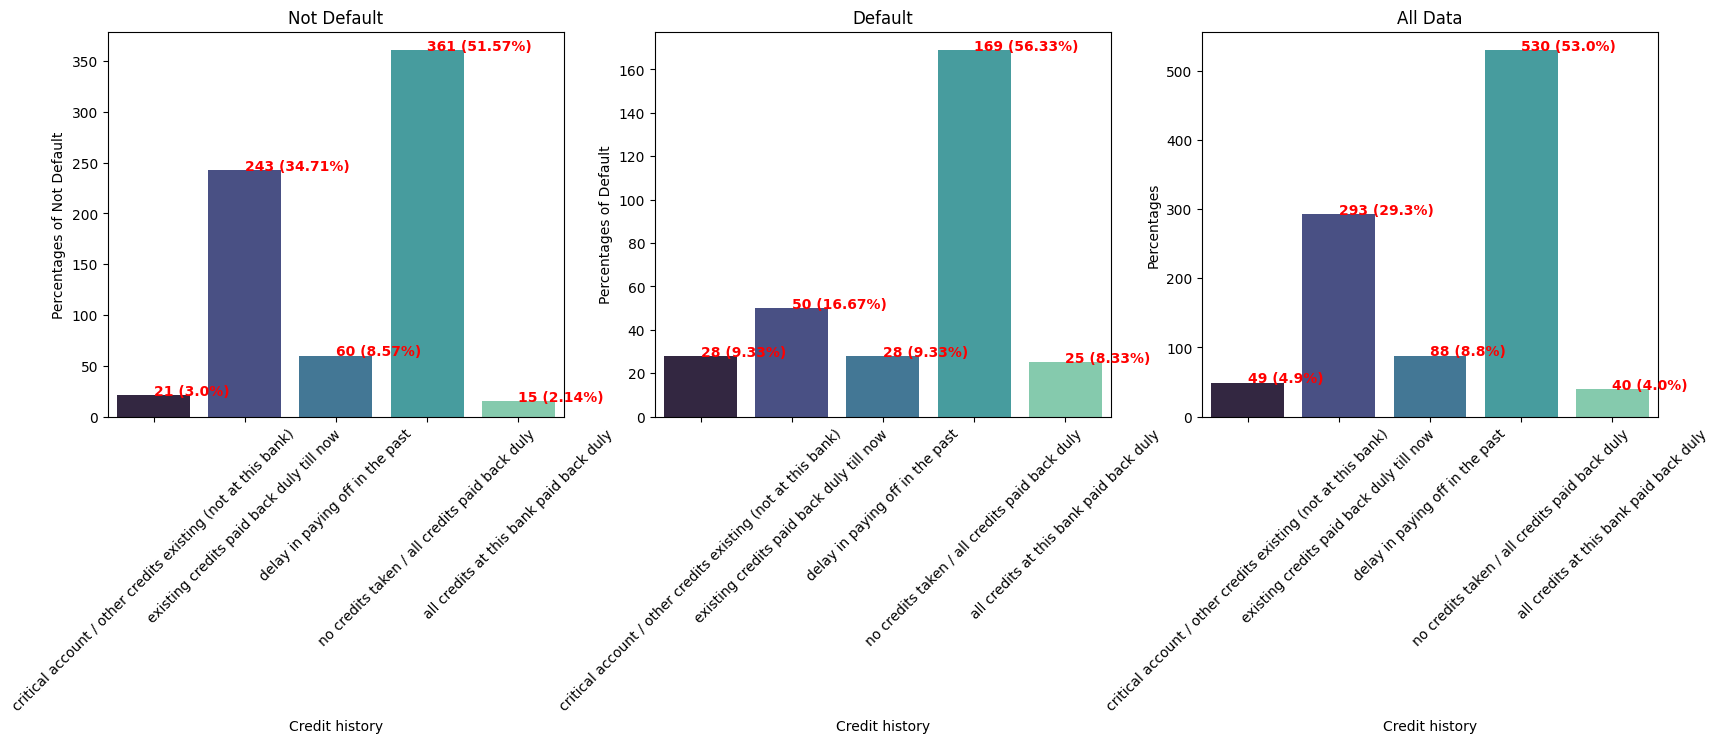

In [19]:
barplot_compare(data, 'Credit history')

### `Purpose`

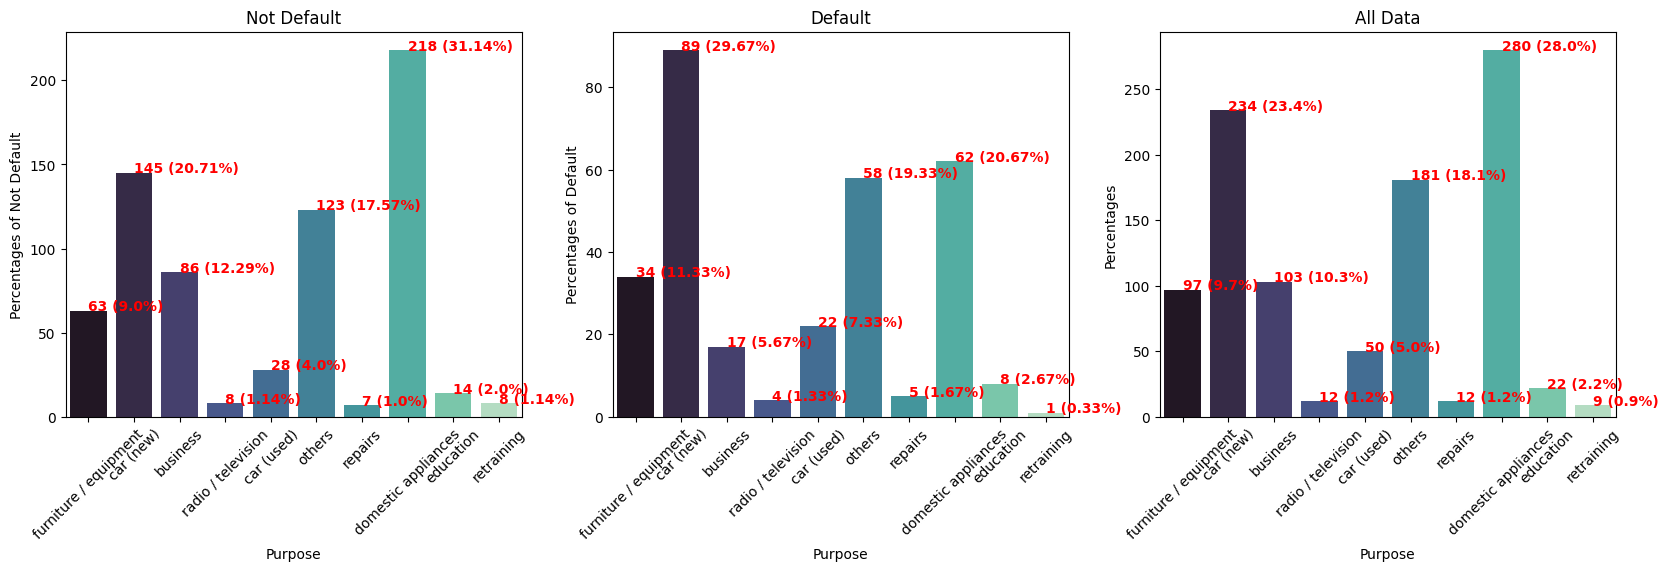

In [20]:
barplot_compare(data, 'Purpose')

### `Savings account/bonnds`

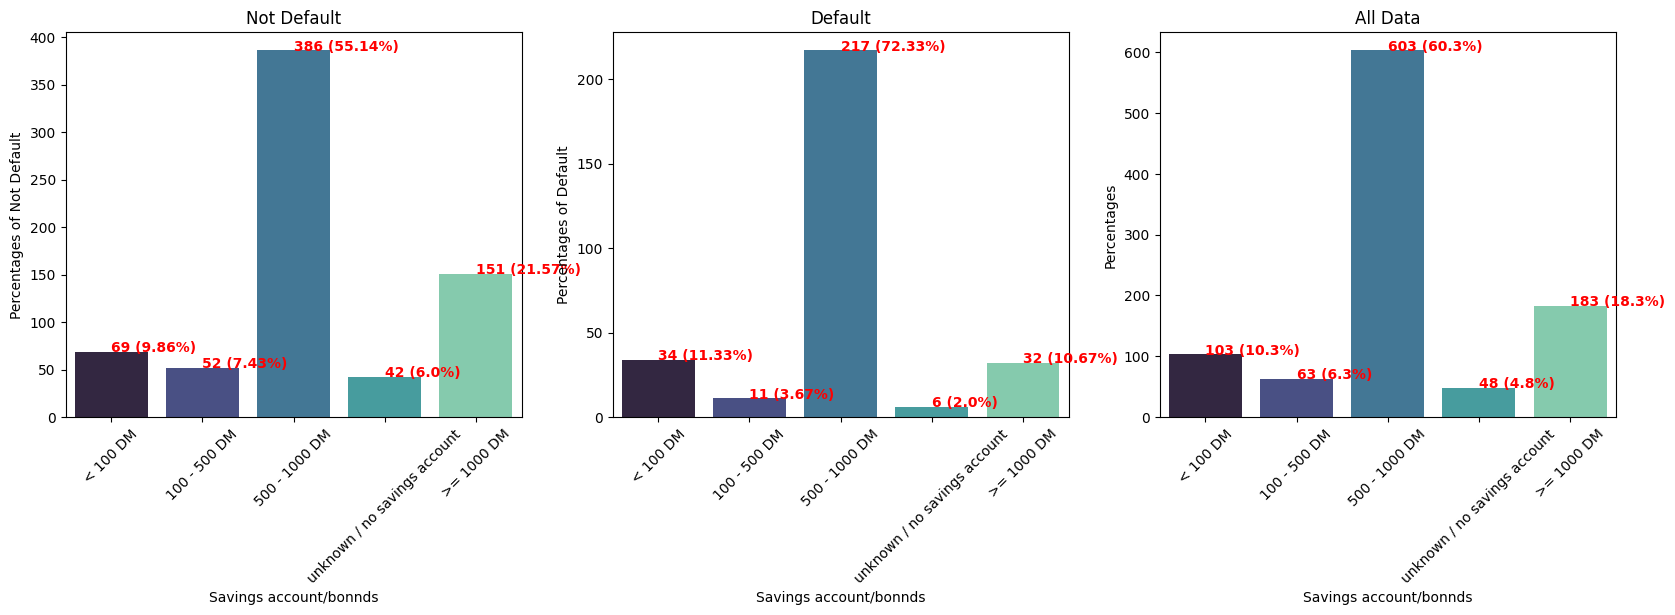

In [21]:
barplot_compare(data, 'Savings account/bonnds')

### `Present employmnet since`

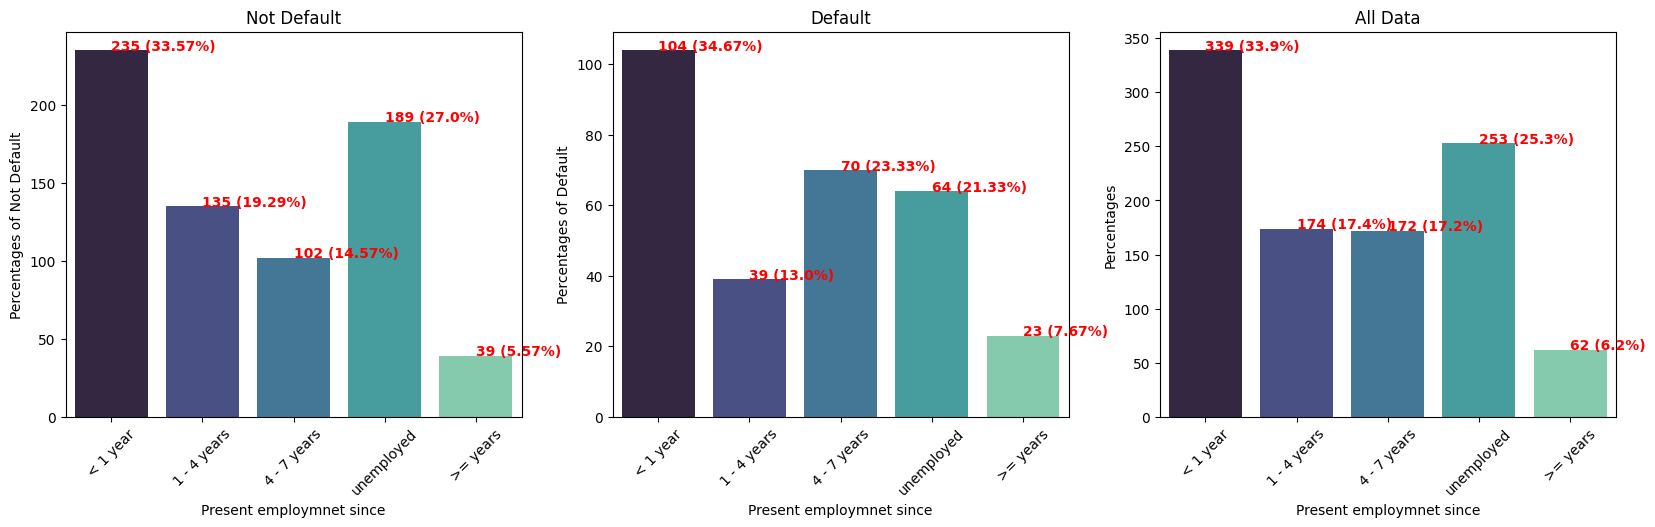

In [22]:
barplot_compare(data, 'Present employmnet since')

### `Personal status`

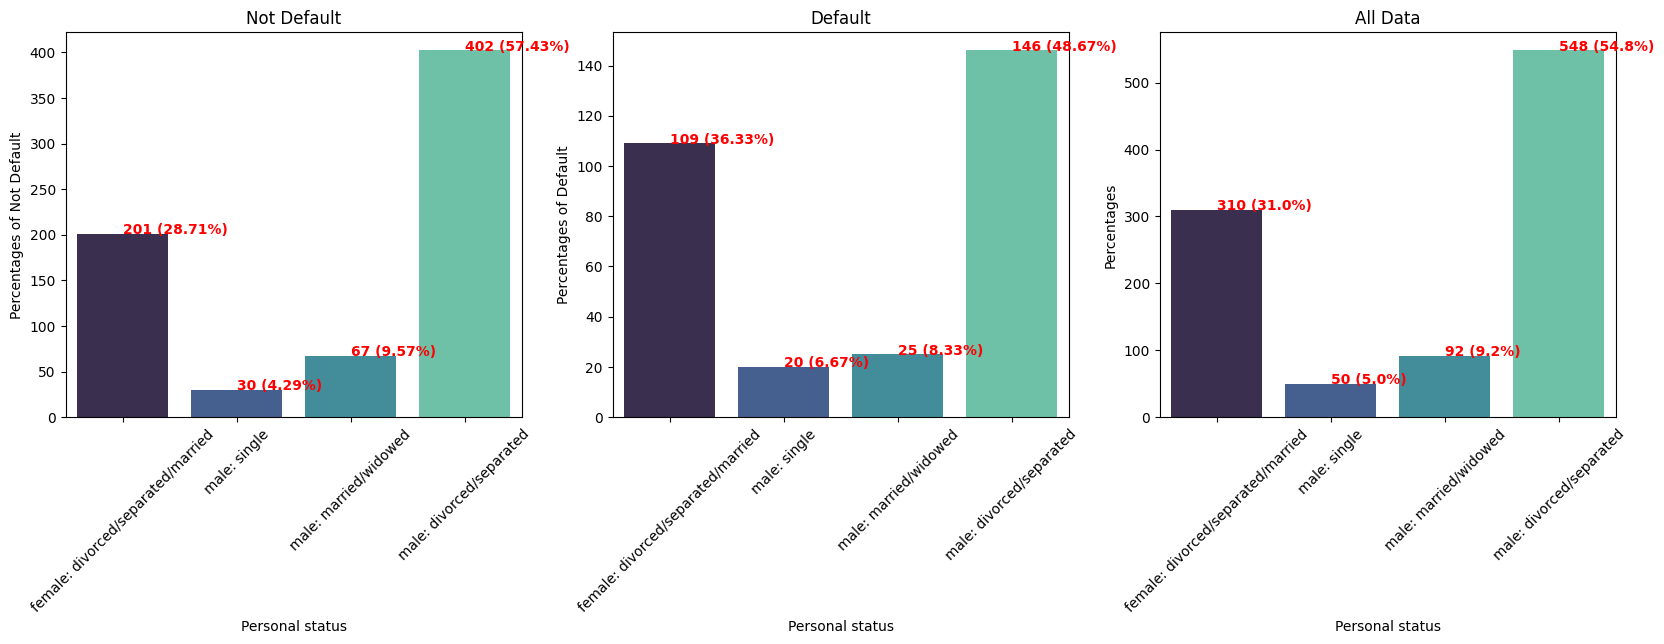

In [23]:
barplot_compare(data, 'Personal status')

### `Other debtors / guarantors`

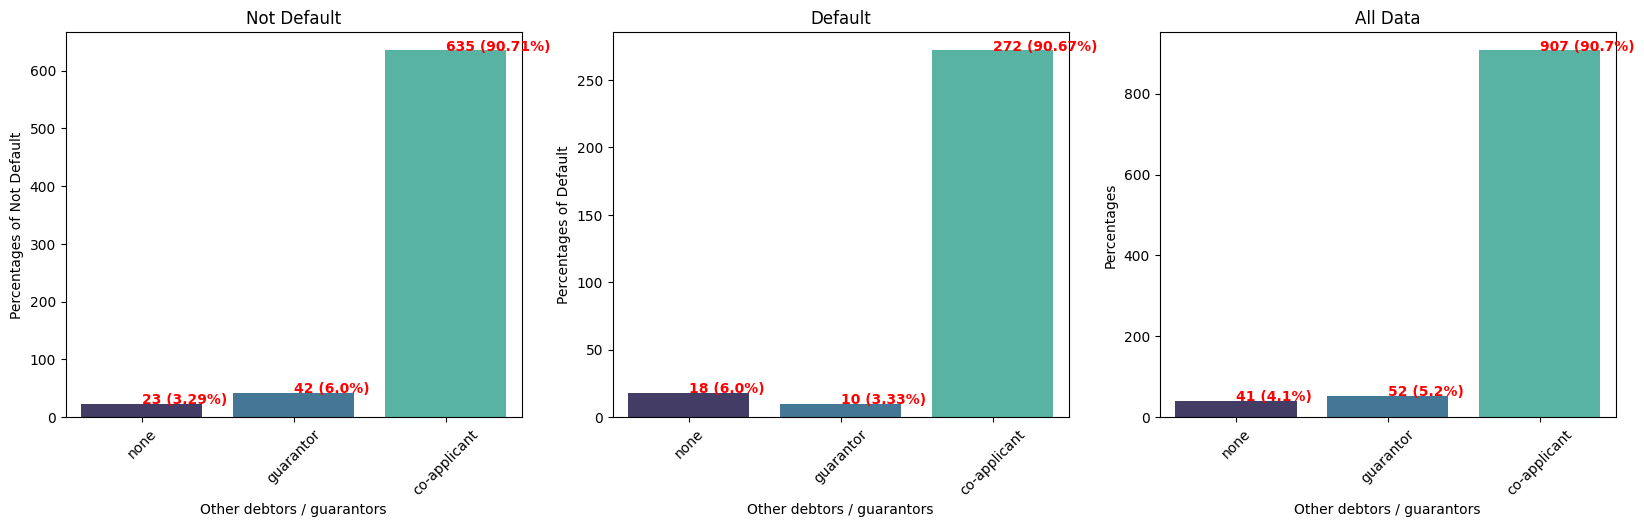

In [24]:
barplot_compare(data, 'Other debtors / guarantors')

### `Property`

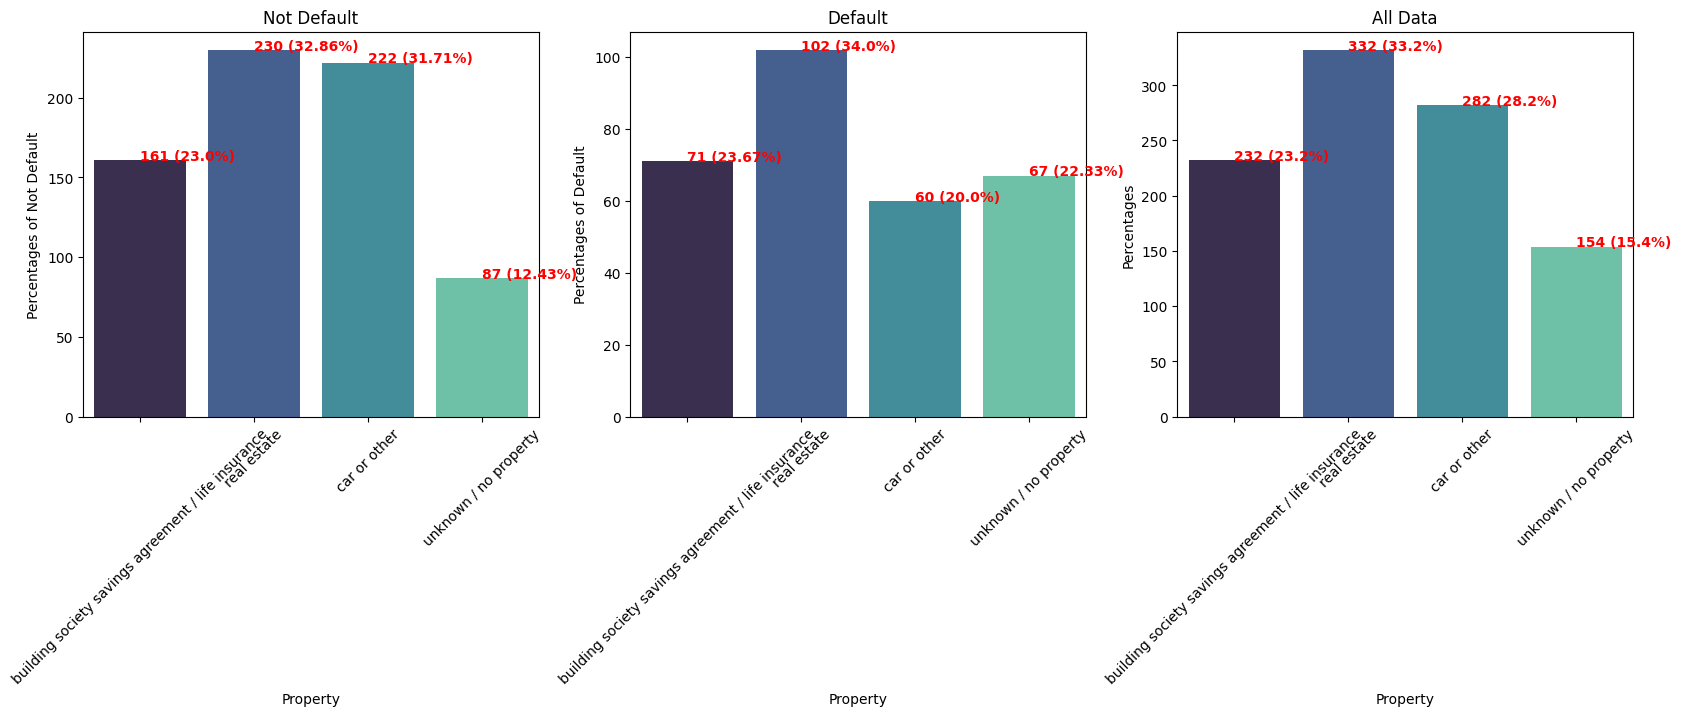

In [25]:
barplot_compare(data, 'Property')

### `Other installment plans`

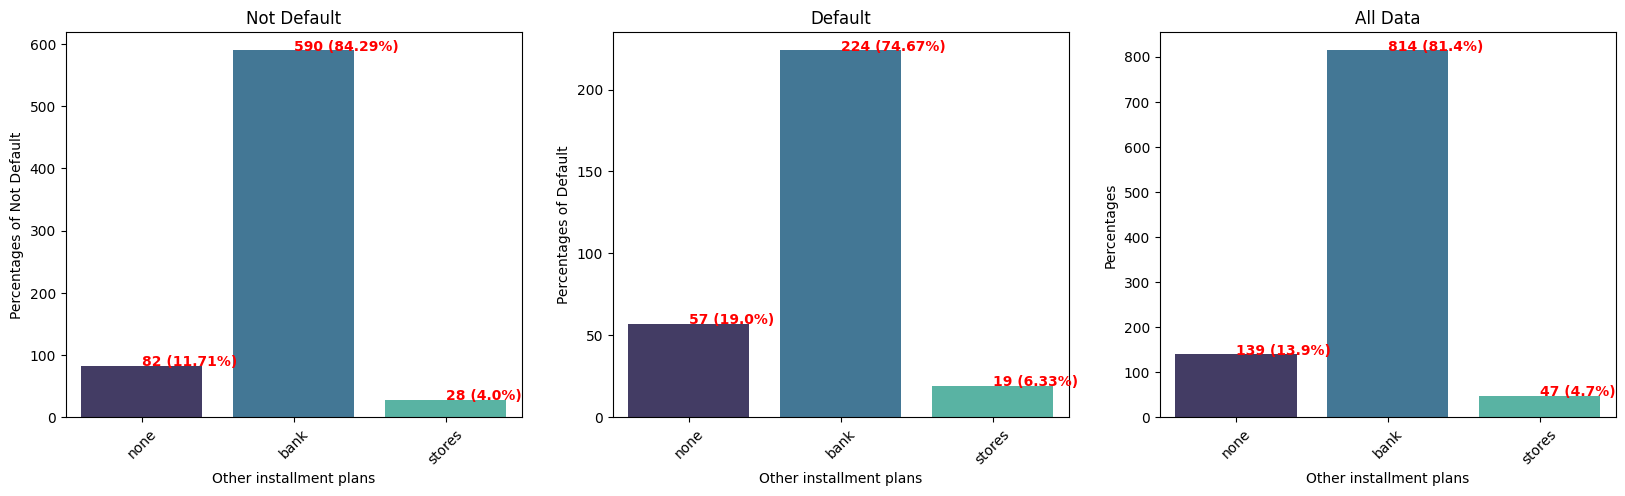

In [26]:
barplot_compare(data, 'Other installment plans')

### `Housing`

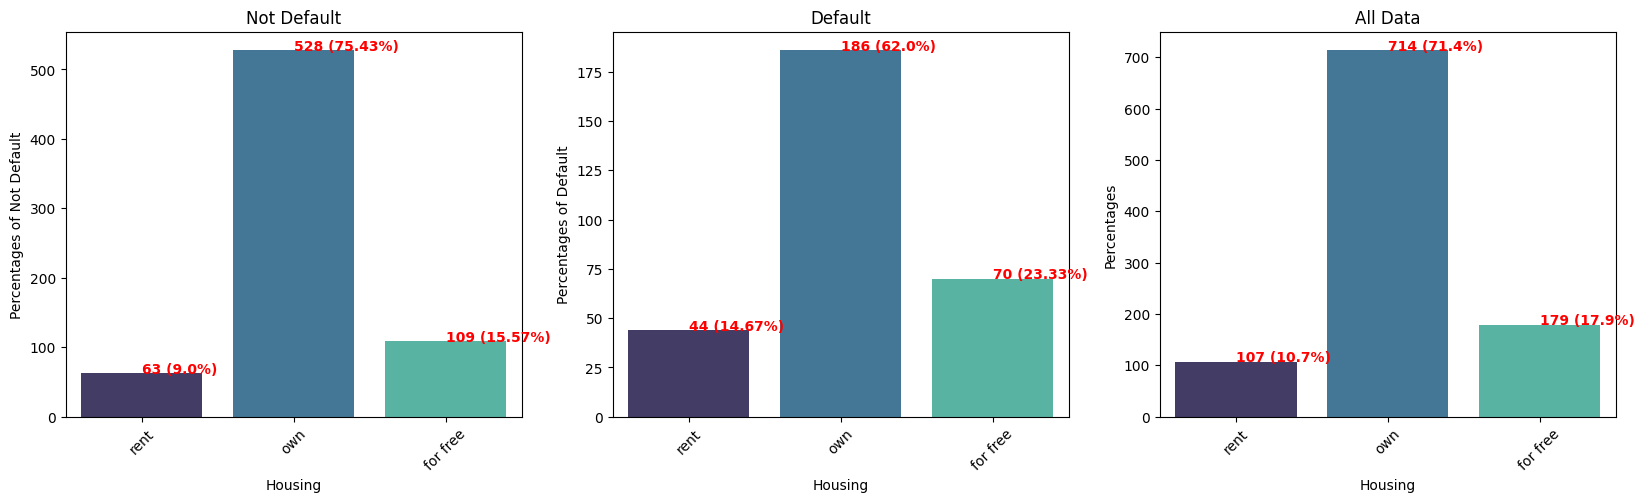

In [27]:
barplot_compare(data, 'Housing')

### `Job`

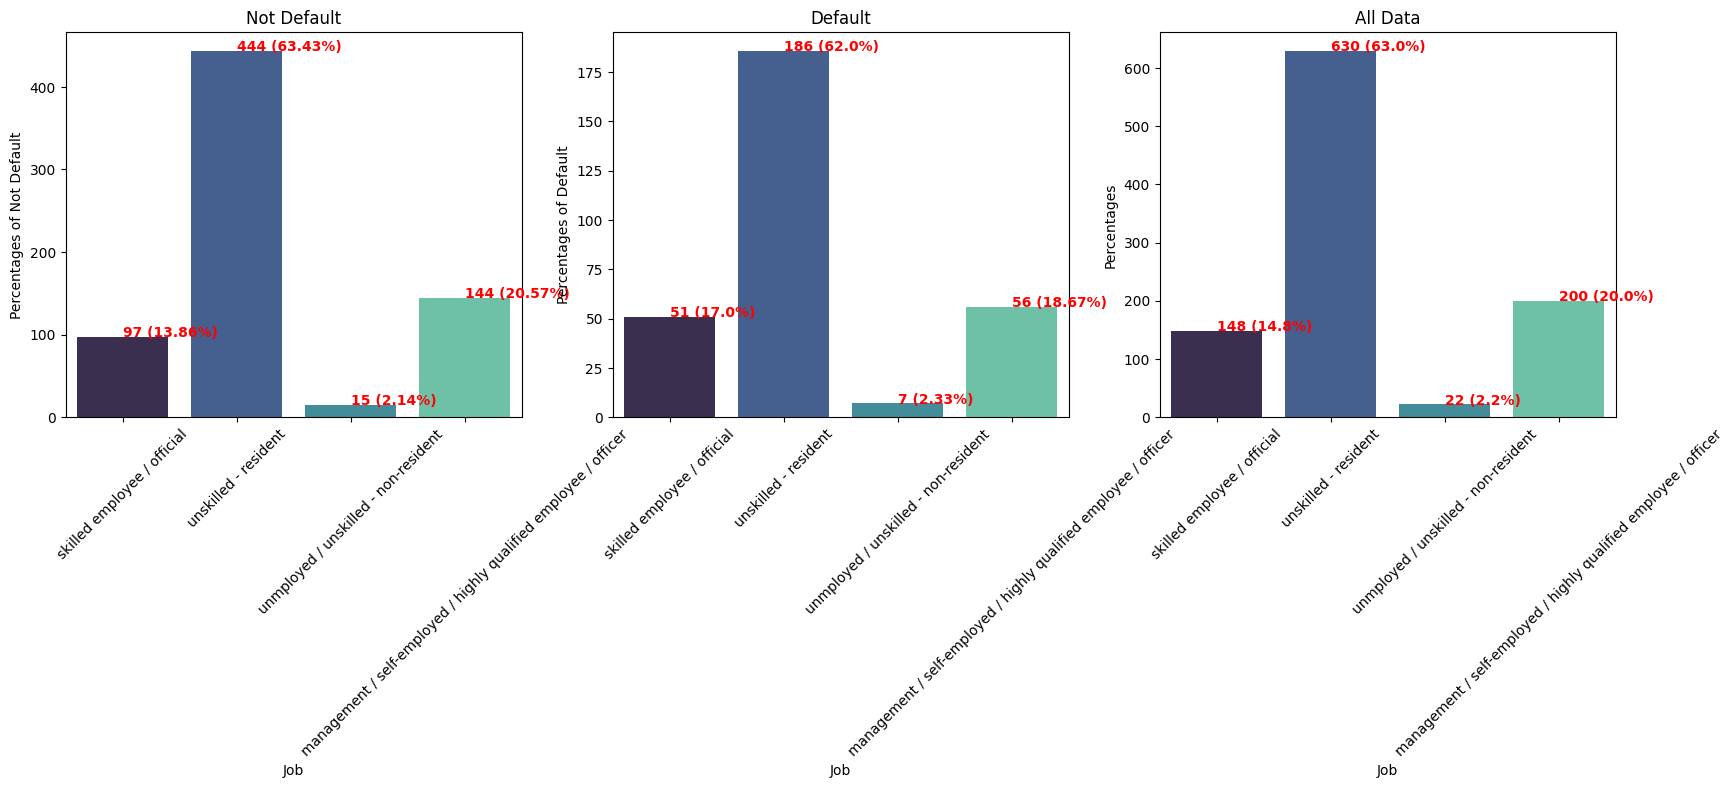

In [28]:
barplot_compare(data, 'Job')

### `Telephone`

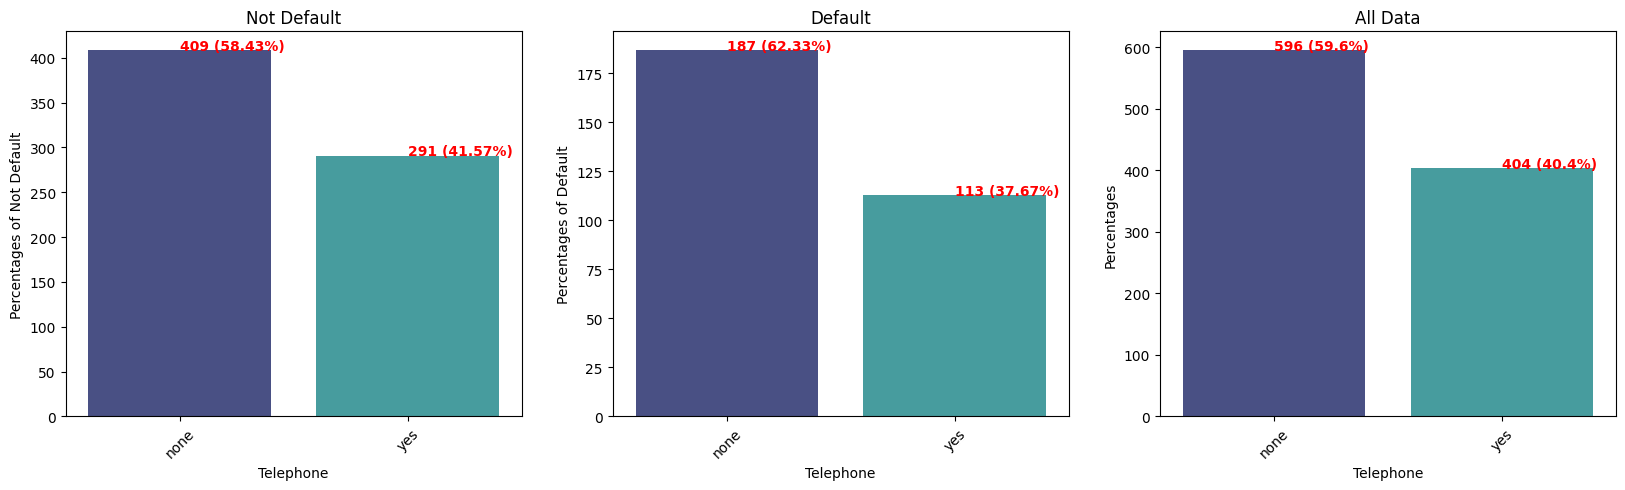

In [29]:
barplot_compare(data, 'Telephone')

### `Foreign worker`

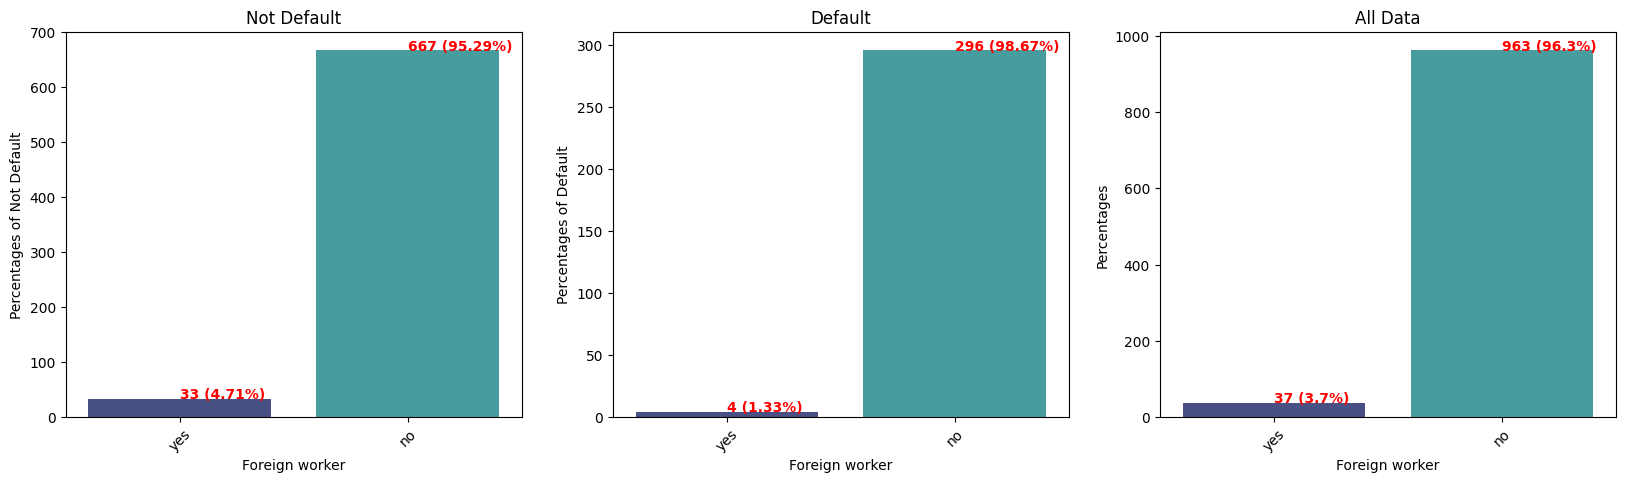

In [30]:
barplot_compare(data, 'Foreign worker')

From the bar chart, we obtained the following information:
1. Many people do not provide checking accounts.
2. People with 'existing credits paid back duly till now' are less likely to default.
3. Many people take credit to buy a radio/TV, a car, or furniture.
4. People with no or little savings are more likely to take out a credit.
5. People with shorter employment time are more likely to default.
6. Many credit are own by men: single.
7. People who do not own property are more likely to default.
8. Many credit taken by people who own housing and skilled employee.

## Bivariate Analysis (Feature Selection)
Find relationship each numerical and categorical columns with `Label`

### Numerical Columns

### `Duration in  month`

Column:  Duration in month
Non-Parametric t-test (independent)
(stat = 77995.500, p = 0.000)

Different distribution (reject H0)
The difference between groups is -5.7 [-12.2 to 0.9] (mean [95% CI])


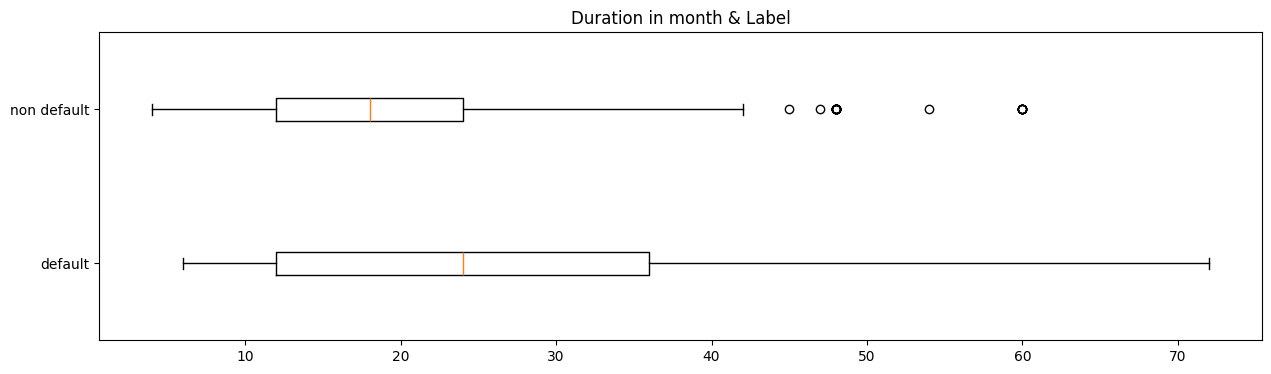

In [31]:
mannwhitney_test(data, 'Label', 'Duration in month','Duration in month & Label')

### `Credit amount`

Column:  Credit amount
Non-Parametric t-test (independent)
(stat = 93480.000, p = 0.006)

Different distribution (reject H0)
The difference between groups is -952.7 [-1338.4 to -567.0] (mean [95% CI])


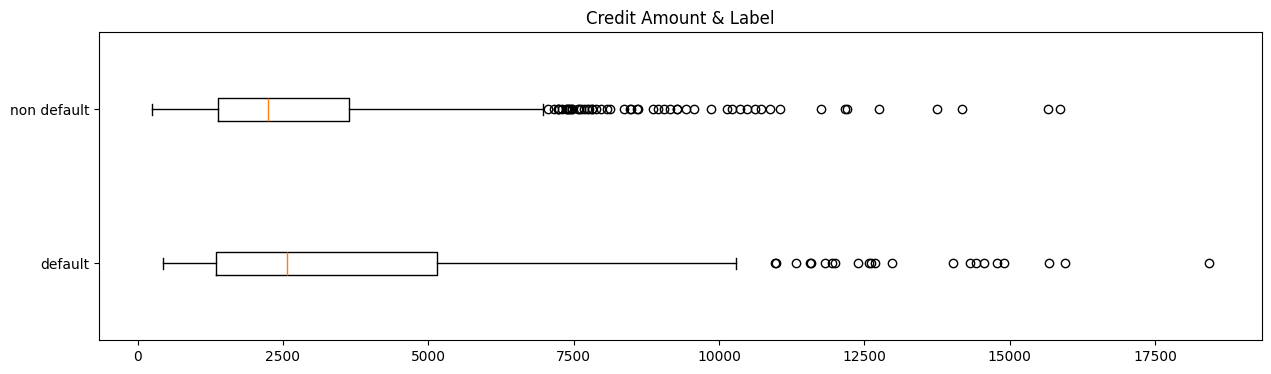

In [32]:
mannwhitney_test(data, 'Label', 'Credit amount','Credit Amount & Label')

### `Installment rate in percentage of disposable income`

Column:  Installment rate in percentage of disposable income
Non-Parametric t-test (independent)
(stat = 95889.500, p = 0.020)

Different distribution (reject H0)
The difference between groups is -0.2 [-2.1 to 1.7] (mean [95% CI])


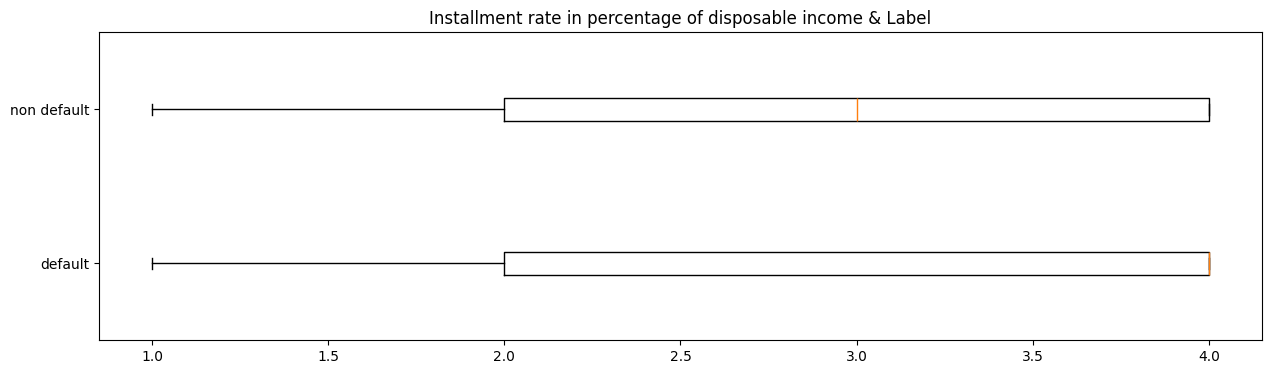

In [33]:
mannwhitney_test(data, 'Label', 'Installment rate in percentage of disposable income','Installment rate in percentage of disposable income & Label')

### `Present residence since`

Column:  Present residence since
Non-Parametric t-test (independent)
(stat = 104680.500, p = 0.936)

Same distribution (fail to reject H0)
The difference between groups is -0.0 [-1.9 to 1.9] (mean [95% CI])


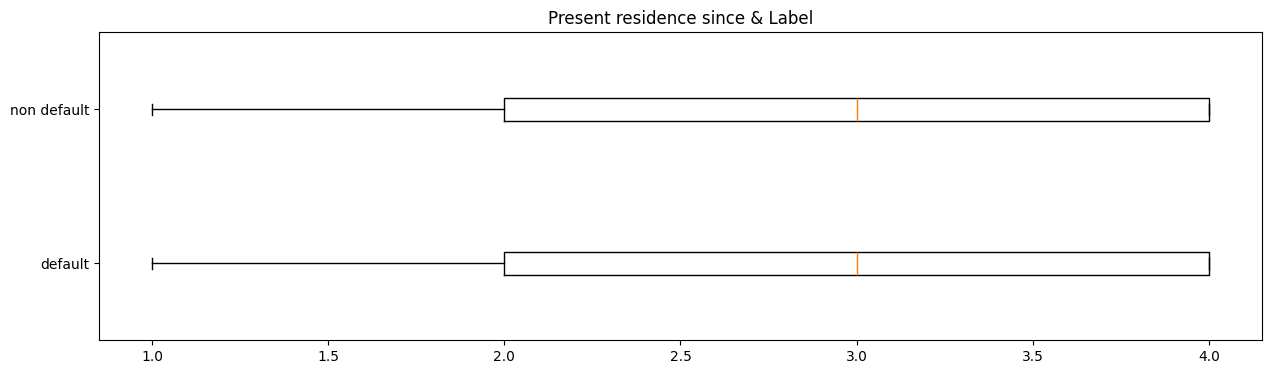

In [34]:
mannwhitney_test(data, 'Label', 'Present residence since','Present residence since & Label')

### `Age in years`

Column:  Age in years
Non-Parametric t-test (independent)
(stat = 119971.500, p = 0.000)

Different distribution (reject H0)
The difference between groups is 2.3 [-2.2 to 6.7] (mean [95% CI])


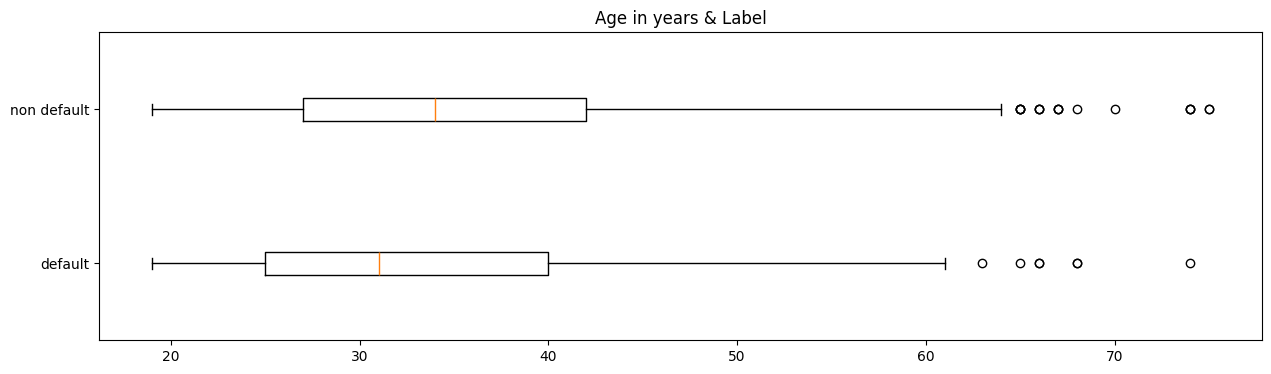

In [35]:
mannwhitney_test(data, 'Label', 'Age in years','Age in years & Label')

### `Number of existing credits at this bank`

Column:  Number of existing credits at this bank
Non-Parametric t-test (independent)
(stat = 110272.000, p = 0.135)

Same distribution (fail to reject H0)
The difference between groups is 0.1 [-0.9 to 1.0] (mean [95% CI])


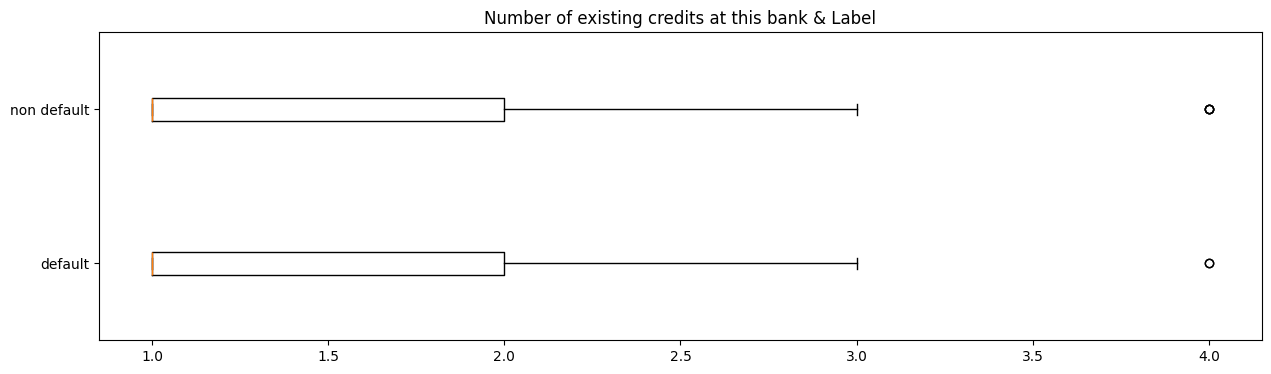

In [36]:
mannwhitney_test(data, 'Label', 'Number of existing credits at this bank','Number of existing credits at this bank & Label')

### `Number of people being liable to provide maintenance for`

Column:  Number of people being liable to provide maintenance for
Non-Parametric t-test (independent)
(stat = 105250.000, p = 0.924)

Same distribution (fail to reject H0)
The difference between groups is 0.0 [-1.6 to 1.6] (mean [95% CI])


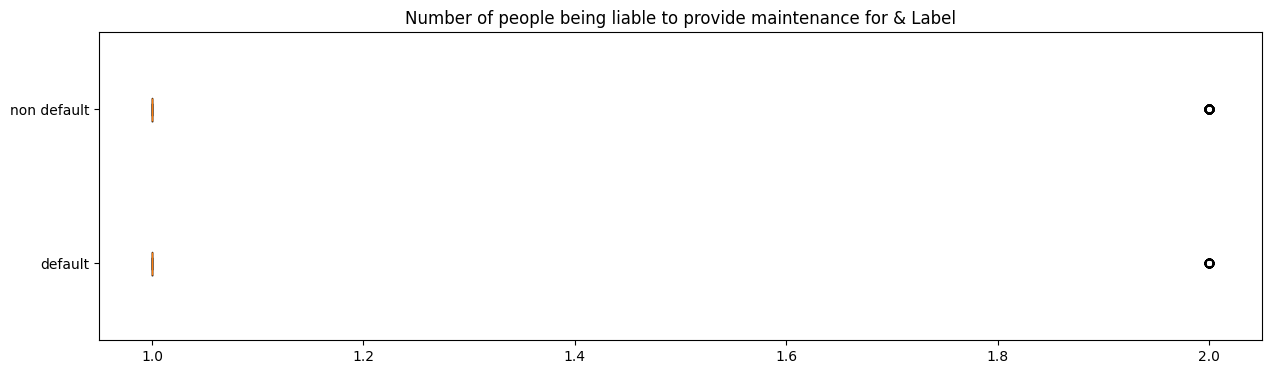

In [37]:
mannwhitney_test(data, 'Label', 'Number of people being liable to provide maintenance for','Number of people being liable to provide maintenance for & Label')

From the boxplot, we obtained the following information:
1. The duration to pay the loan is longer to default people.
2. The non default people have less money in the bank than the default people.
3. The default people have higher median installment rate than the non default people.
4. Younger people have higher risk to default than older people.

Lastly, it shows that the `Present residence since`, `Number of existing credits at this bank`, and `Number of people being liable to provide maintenance for` columns have same distribution for default and non default population.

### Categorical Columns

In [ ]:
# checking relation of each categorical columns to 'Label'
object_cols = list(data.select_dtypes(include='object'))
for cols in object_cols:
    chi2_test(data,cols)

Column:  Status of existing checking account
Chi-Square test
Dependent on each other (reject H0)
(stat = 123.721, p = 0.000)
---------------------------------
Column:  Credit history
Chi-Square test
Dependent on each other (reject H0)
(stat = 61.691, p = 0.000)
---------------------------------
Column:  Purpose
Chi-Square test
Dependent on each other (reject H0)
(stat = 33.356, p = 0.000)
---------------------------------
Column:  Savings account/bonnds
Chi-Square test
Dependent on each other (reject H0)
(stat = 36.099, p = 0.000)
---------------------------------
Column:  Present employmnet since
Chi-Square test
Dependent on each other (reject H0)
(stat = 18.368, p = 0.001)
---------------------------------
Column:  Personal status
Chi-Square test
Dependent on each other (reject H0)
(stat = 9.605, p = 0.022)
---------------------------------
Column:  Other debtors / guarantors
Chi-Square test
Dependent on each other (reject H0)
(stat = 6.645, p = 0.036)
-------------------------------

From the chi-square test, it shows that 'Job' and 'Telephone' are independent to 'Label'

# Data Preparation

In [ ]:
# import dataset
data = pd.read_csv(project_path+'/data/german_credit_data.csv', sep=";")

In [40]:
data_prep = data_preparation()
data_prep.sample_data(data,columns_to_convert)
data_prep.fe_data()

Data Shape:  (1000, 21)
Data Train Shape:  (800, 21)
Data Test Shape:  (200, 21)
train -  [560 240]   |   test -  [140  60]


In [41]:
data_prep_without_scaler = data_preparation()
data_prep_without_scaler.sample_data(data,columns_to_convert)
data_prep_without_scaler.fe_data(scaling = False)

Data Shape:  (1000, 21)
Data Train Shape:  (800, 21)
Data Test Shape:  (200, 21)
train -  [560 240]   |   test -  [140  60]


In [42]:
data_fs = data.drop(['Present residence since','Number of existing credits at this bank','Number of people being liable to provide maintenance for','Job','Telephone'],axis = 1)
data_prep_fs = data_preparation()
data_prep_fs.sample_data(data,columns_to_convert)
data_prep_fs.fe_data()

Data Shape:  (1000, 21)
Data Train Shape:  (800, 21)
Data Test Shape:  (200, 21)
train -  [560 240]   |   test -  [140  60]


### Over-sampling using SMOTE

In [43]:
X_train_sam, y_train_sam = smote_tomek(data_prep.X_train,data_prep.y_train,print_result=False)

In [44]:
X_train_sam_fs, y_train_sam_fs = smote_tomek(data_prep_fs.X_train,data_prep_fs.y_train,print_result=True)

Original dataset shape: 0:  560 1:  240
Sampling dataset shape: 0:  531 1:  280
majority data reduce: 5.18%
minority data generate: 16.67%


# Model 1: Random Forest

## All feature & log transformation in numerical column

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Accuracy: 0.745 | Precision: 0.615 | Recall: 0.4 | F1-Score: 0.485 | AUC: 0.646 
Confusion Matrix: 
 [[125  15]
 [ 36  24]]


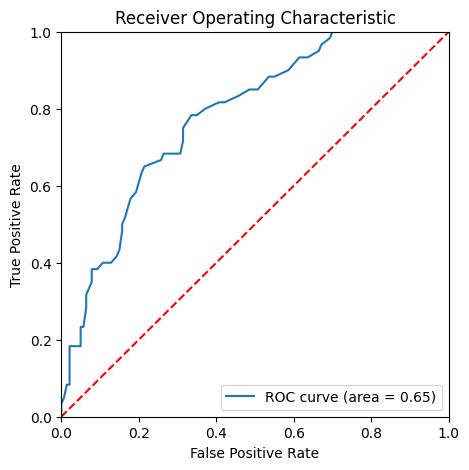

In [46]:
rf_model = RandomForestClassifier(random_state=0)
rf_model_log = model(rf_model,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.745 | Precision: 0.615 | Recall: 0.4 | F1-Score: 0.485 | AUC: 0.646 
Confusion Matrix: 
 [[125  15]
 [ 36  24]]


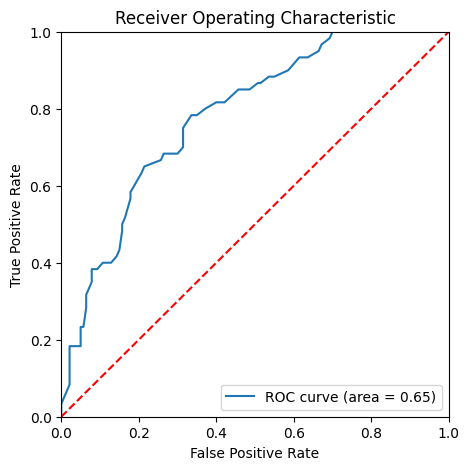

In [ ]:
# without scaler
rf_model = RandomForestClassifier(random_state=0)
rf_model_log = model(rf_model,data_prep_without_scaler.X_train,data_prep_without_scaler.X_test,data_prep_without_scaler.y_train.iloc[:,0].ravel(),data_prep_without_scaler.y_test)

Accuracy: 0.745 | Precision: 0.615 | Recall: 0.4 | F1-Score: 0.485 | AUC: 0.646 
Confusion Matrix: 
 [[125  15]
 [ 36  24]]


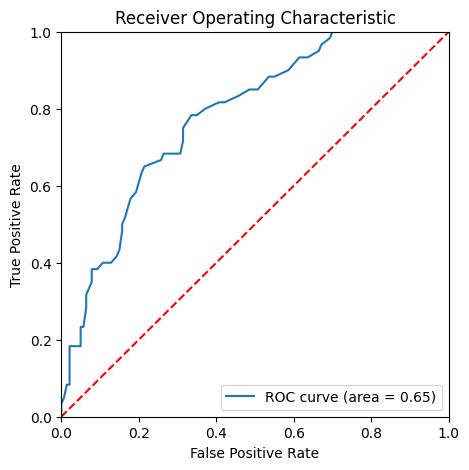

In [ ]:
# with feature selection
rf_model = RandomForestClassifier(random_state=0)
rf_model_log = model(rf_model,data_prep_fs.X_train,data_prep_fs.X_test,data_prep_fs.y_train.iloc[:,0].ravel(),data_prep_fs.y_test)

## Random Search with All feature & Log transformation in numerical column

In [ ]:
# Random Search
params = {
    "criterion" : ['gini', 'entropy'],
    "n_estimators": np.arange(50,1000,10),
    "max_depth": np.arange(5,11,1),
    "min_samples_split": np.arange(2,101,5),
    "min_samples_leaf":np.arange(1,101,5),
    "min_impurity_decrease":np.arange(0,10),
    "max_features" : ['auto', 'sqrt', 'log2']
    }
rf_model = RandomForestClassifier(random_state=0)
rf_random_search=random_search(parameters=params,X=data_prep.X_train,y=data_prep.y_train.iloc[:,0].ravel(),model=rf_model,iter=100)

Best Parameters: RandomForestClassifier(max_depth=np.int64(8), min_impurity_decrease=np.int64(0),
                       min_samples_leaf=np.int64(11),
                       min_samples_split=np.int64(27),
                       n_estimators=np.int64(780), random_state=0)


Accuracy: 0.745 | Precision: 0.667 | Recall: 0.3 | F1-Score: 0.414 | AUC: 0.618 
Confusion Matrix: 
 [[131   9]
 [ 42  18]]


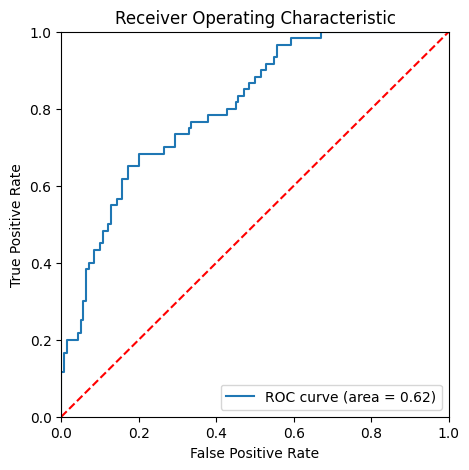

In [50]:
rf_model_tunning = RandomForestClassifier(max_depth=10, min_impurity_decrease=0,
                       min_samples_leaf=6, min_samples_split=22,
                       n_estimators=480, random_state=0)
rf_model_random_search = model(rf_model_tunning,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

## Using SMOTE-TomekLink

Accuracy: 0.75 | Precision: 0.604 | Recall: 0.483 | F1-Score: 0.537 | AUC: 0.674 
Confusion Matrix: 
 [[121  19]
 [ 31  29]]


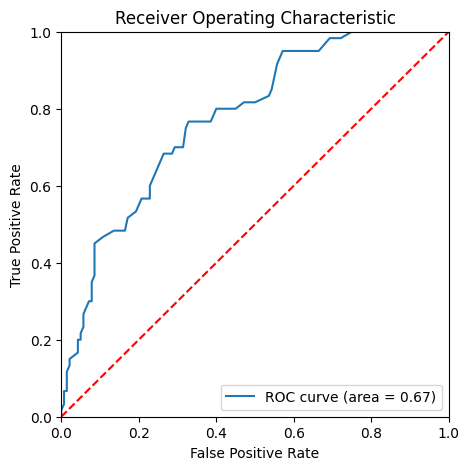

In [51]:
rf_model_oversampling = RandomForestClassifier(random_state=0)
rf_model_smote = model(rf_model_oversampling,X_train_sam,data_prep.X_test,y_train_sam.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.75 | Precision: 0.604 | Recall: 0.483 | F1-Score: 0.537 | AUC: 0.674 
Confusion Matrix: 
 [[121  19]
 [ 31  29]]


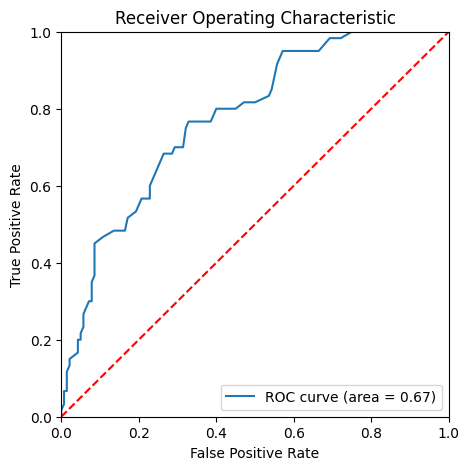

In [ ]:
# with feature selection
rf_model_oversampling = RandomForestClassifier(random_state=0)
rf_model_smote = model(rf_model_oversampling,X_train_sam_fs,data_prep_fs.X_test,y_train_sam_fs.iloc[:,0].ravel(),data_prep_fs.y_test)

From the model training process using the Random Forest algorithm above, it shows that scaling and feature selection did not significantly impact the model's performance. On the other hand, implementing SMOTE-Tomek Link slightly improved the model's performance.

# Model 2: Logistic Regression

## All feature & log transformation in numerical column

Accuracy: 0.76 | Precision: 0.62 | Recall: 0.517 | F1-Score: 0.564 | AUC: 0.69 
Confusion Matrix: 
 [[121  19]
 [ 29  31]]


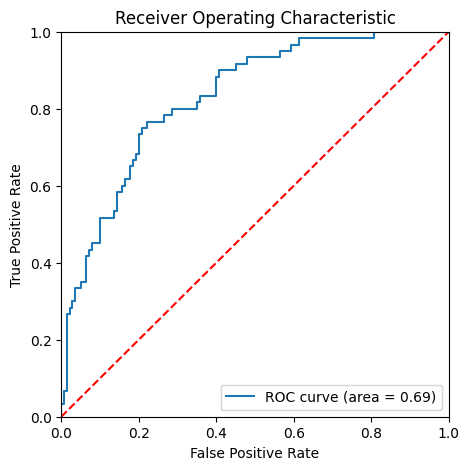

In [53]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model = model(log_reg_model,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.765 | Precision: 0.633 | Recall: 0.517 | F1-Score: 0.569 | AUC: 0.694 
Confusion Matrix: 
 [[122  18]
 [ 29  31]]


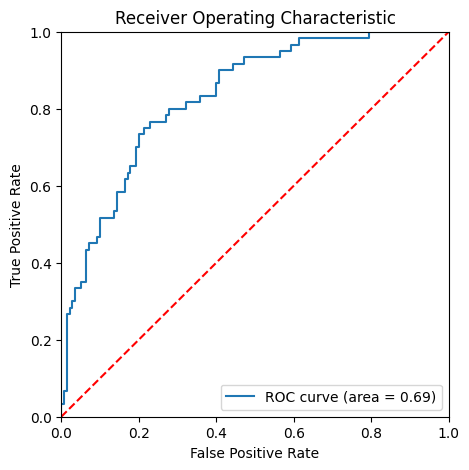

In [ ]:
# without scaler
log_reg_model = LogisticRegression(random_state=0)
log_reg_model = model(log_reg_model,data_prep_without_scaler.X_train,data_prep_without_scaler.X_test,data_prep_without_scaler.y_train.iloc[:,0].ravel(),data_prep_without_scaler.y_test)

Accuracy: 0.76 | Precision: 0.62 | Recall: 0.517 | F1-Score: 0.564 | AUC: 0.69 
Confusion Matrix: 
 [[121  19]
 [ 29  31]]


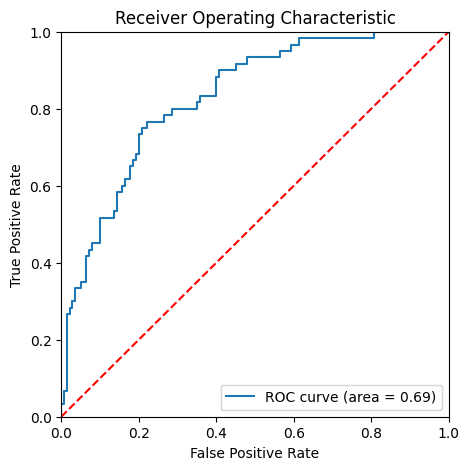

In [ ]:
# with feature selection
log_reg_model = LogisticRegression(random_state=0)
log_reg_model = model(log_reg_model,data_prep_fs.X_train,data_prep_fs.X_test,data_prep_fs.y_train.iloc[:,0].ravel(),data_prep_fs.y_test)

## Random Search with All feature & Log transformation in numerical column

In [56]:
params = {
    "solver": ['liblinear'],
    "penalty":['l1', 'l2'],
    "C": np.logspace(0, 1, 100),
    }    
log_reg_model = LogisticRegression(random_state=0)
log_reg_random_search = random_search(parameters=params,X=data_prep.X_train,y=data_prep.y_train.iloc[:,0].ravel(),model=log_reg_model,iter=2000,cv_default = False)

Best Parameters: LogisticRegression(C=np.float64(1.0), penalty='l1', random_state=0,
                   solver='liblinear')


Accuracy: 0.765 | Precision: 0.633 | Recall: 0.517 | F1-Score: 0.569 | AUC: 0.694 
Confusion Matrix: 
 [[122  18]
 [ 29  31]]


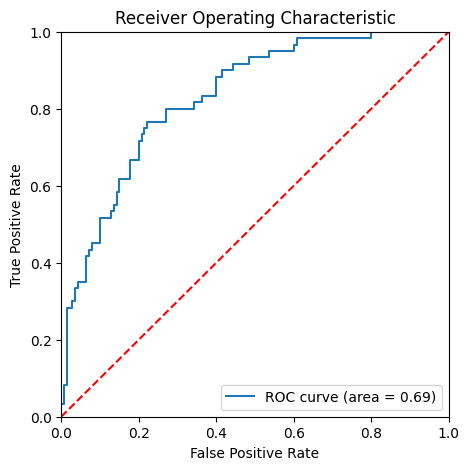

In [ ]:
log_reg_model_tunning = LogisticRegression(C=4.977023564332112, penalty='l1', random_state=0, solver='liblinear')
log_reg_model_random_search = model(log_reg_model_tunning,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

## Using SMOTE-TomekLink

Accuracy: 0.765 | Precision: 0.618 | Recall: 0.567 | F1-Score: 0.591 | AUC: 0.708 
Confusion Matrix: 
 [[119  21]
 [ 26  34]]


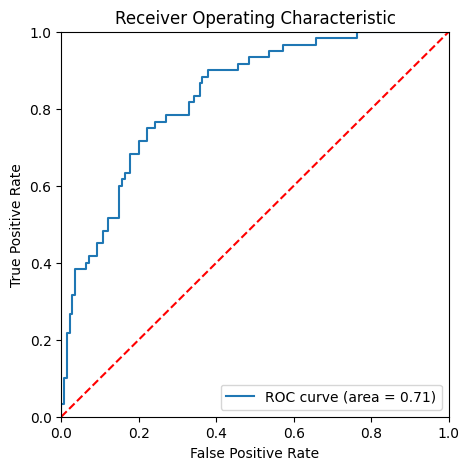

In [58]:
log_reg_model_oversampling = LogisticRegression(random_state=0)
log_reg_model_smote = model(log_reg_model_oversampling,X_train_sam,data_prep.X_test,y_train_sam.iloc[:,0].ravel(),data_prep.y_test)

Similarly, the model training process using the Logistic Regression algorithm did not show a significant impact from scaling and feature selection. However, the implementation of SMOTE-Tomek Link slightly improved the model's performance. Overall, the Logistic Regression algorithm achieved better accuracy compared to the Random Forest, with the best-performing model being Logistic Regression with oversampling.